# Aim: Make a compeletly manual model for Regression
***
***
    Do EDA, prep processing
    Use all the regreeion algorithms
    Look at the metrics
    Finally compatre your and Pycaret models    
***

### Importing all the Libararies required

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [3]:
import xgboost
from pycaret.regression import *
from pycaret.regression import load_model, predict_model

import warnings
warnings.filterwarnings('ignore')

In [26]:
data = datasets.load_boston()

# Read the DataFrame, first using the feature data
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add a target column, and fill it with the target data
df['target'] = data.target

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [28]:
# Find categorical and numerical features
# Find importnant features and coorealtion of features

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [31]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [32]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [36]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


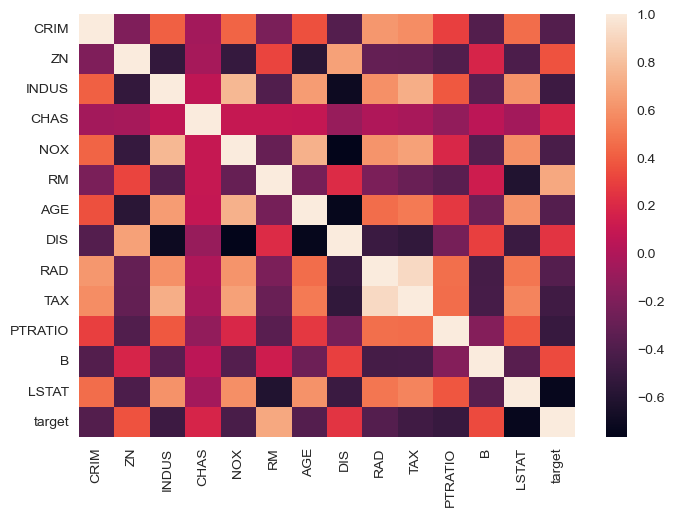

In [39]:
sns.heatmap(df.corr())
plt.show()

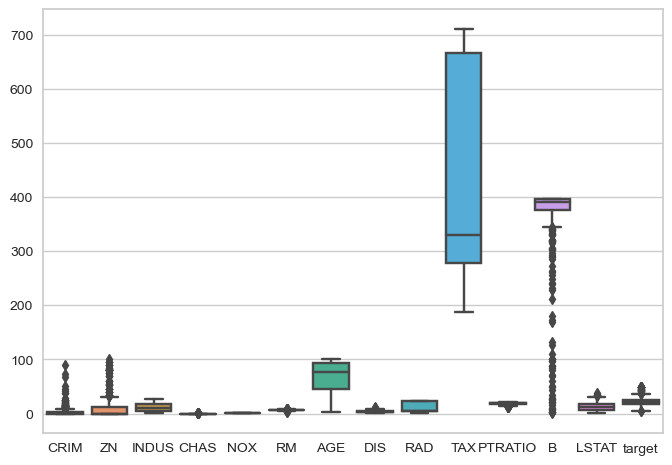

In [42]:
sns.boxplot(data=df)
plt.show()

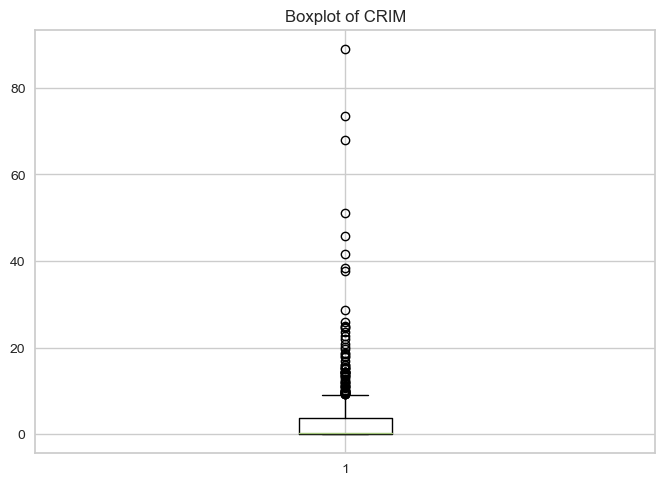

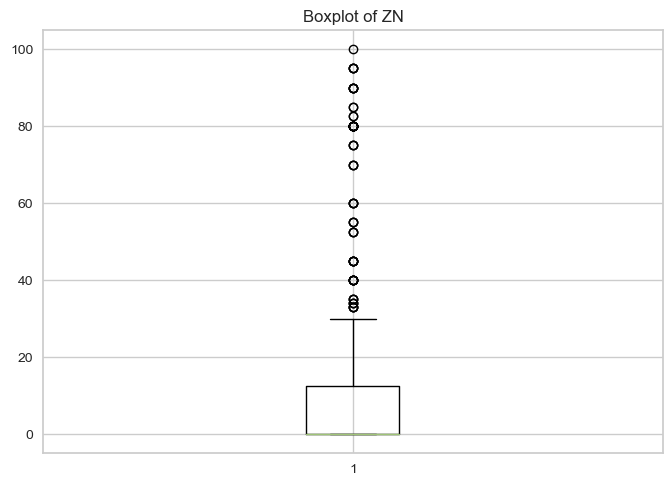

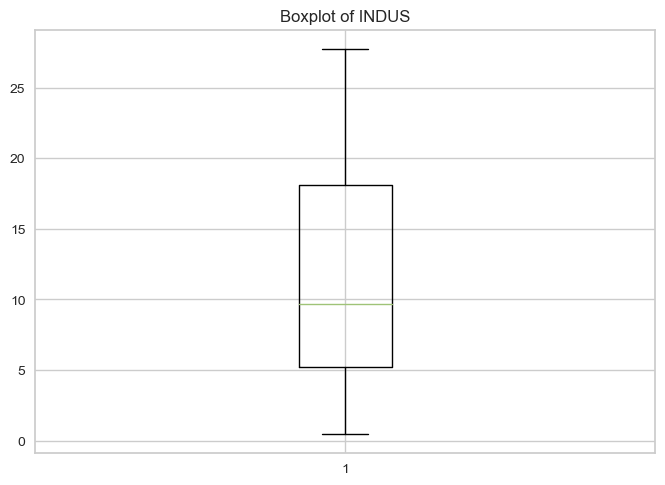

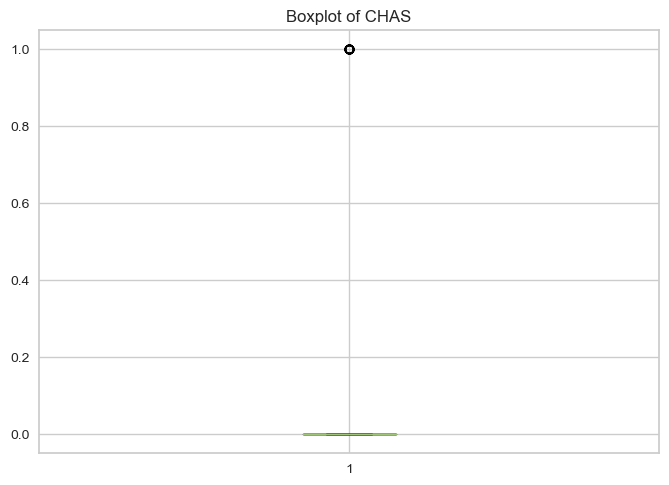

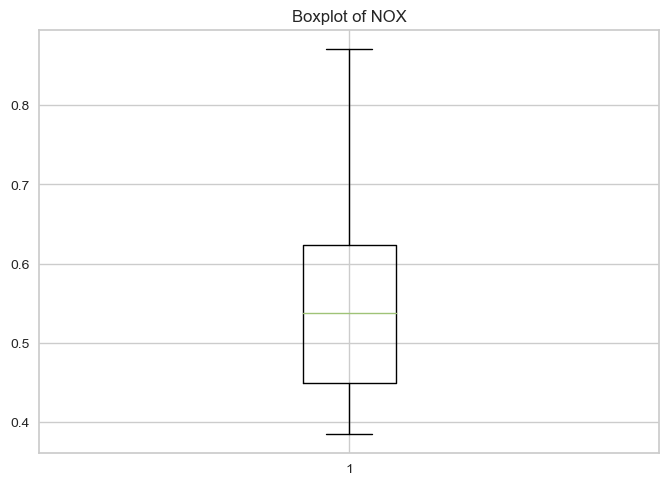

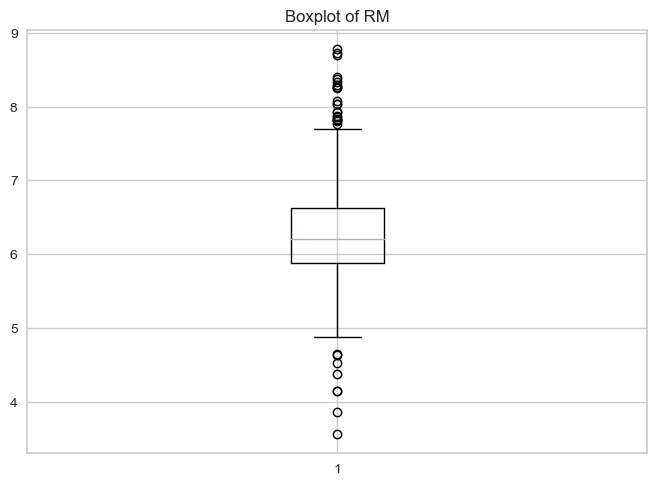

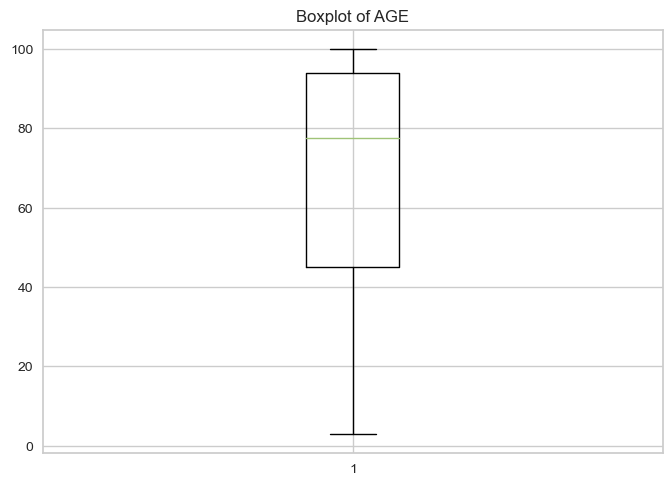

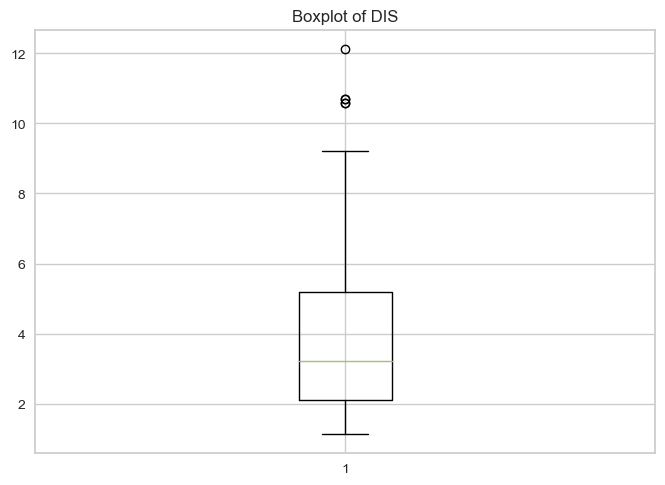

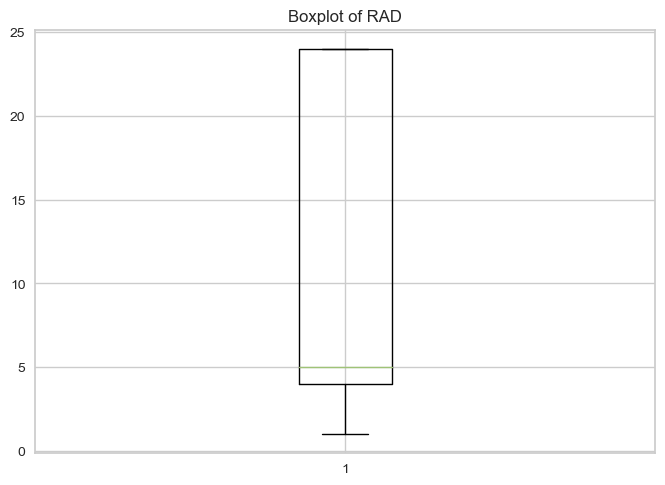

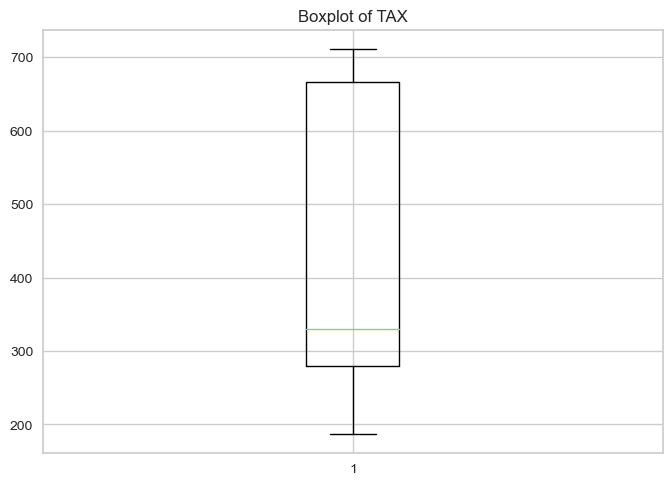

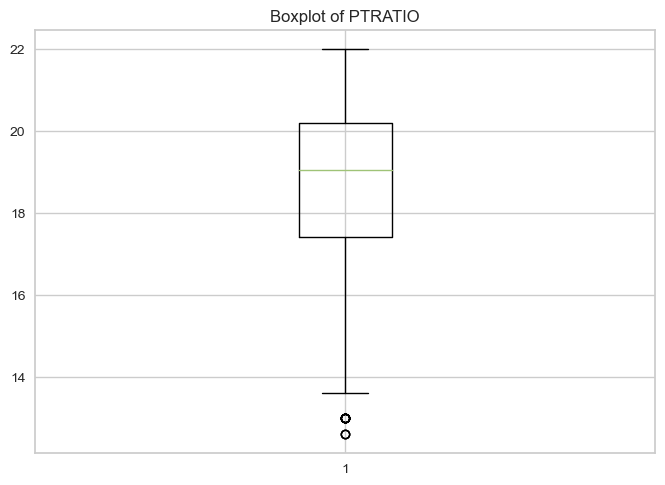

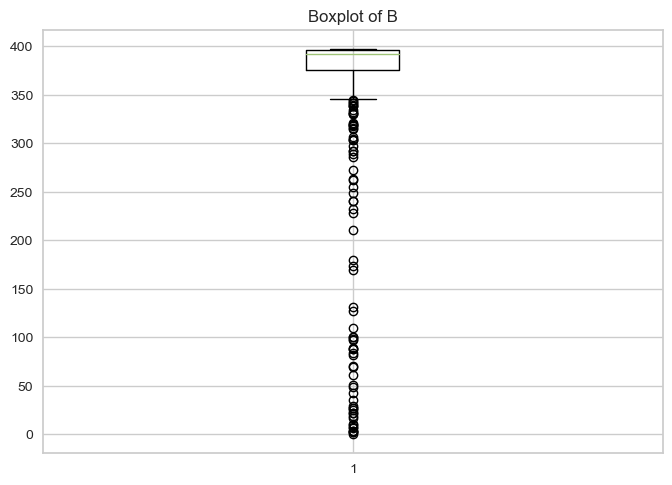

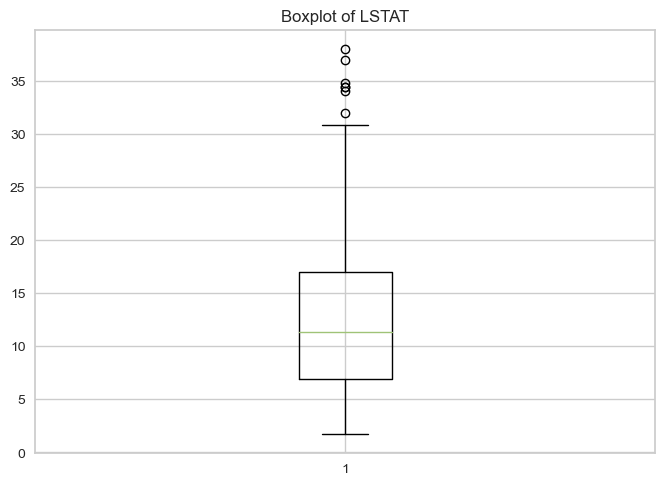

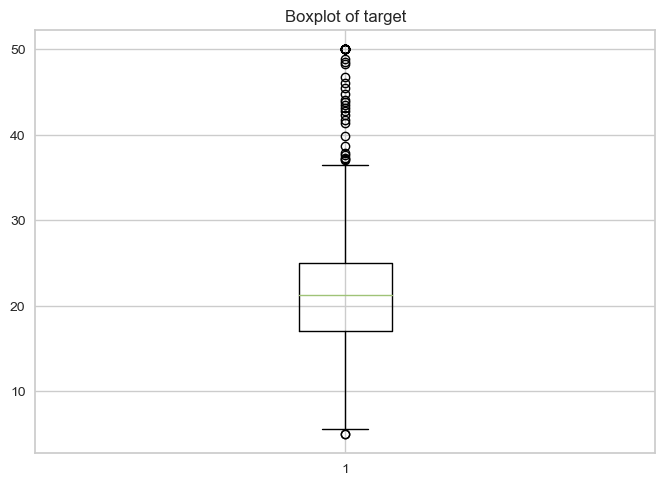

In [49]:
for i in df.columns:
    plt.boxplot(x=i,data=df)
    plt.title(f'Boxplot of {i}')
    plt.show()

### Conc:
    There are a lot of outliers in most of the features

In [57]:
for i in df.columns:
    print(f'Number of uniques in column {i} are {df[i].nunique()}')

# df.apply(lambda column: print(f'Number of uniques in column {column.name} are {column.nunique()}'))

Number of uniques in column CRIM are 504
Number of uniques in column ZN are 26
Number of uniques in column INDUS are 76
Number of uniques in column CHAS are 2
Number of uniques in column NOX are 81
Number of uniques in column RM are 446
Number of uniques in column AGE are 356
Number of uniques in column DIS are 412
Number of uniques in column RAD are 9
Number of uniques in column TAX are 66
Number of uniques in column PTRATIO are 46
Number of uniques in column B are 357
Number of uniques in column LSTAT are 455
Number of uniques in column target are 229


### Conc:
    CHAS and RAD can be treated as categorical: Do one hot encoding for them

In [61]:
cat=['CHAS', 'RAD']
num=[]

num=[i for i in df.columns if i not in cat]
print(f'Categorical {cat}\nNumerical {num}')


Categorical ['CHAS', 'RAD']
Numerical ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'target']


In [78]:
num.remove('target')

In [79]:
num

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

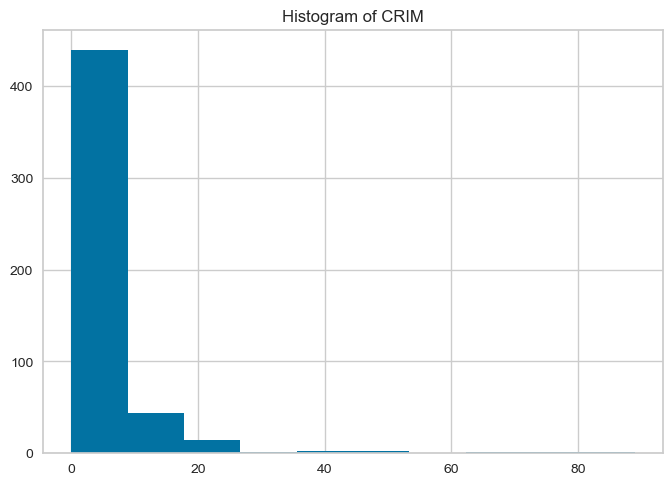

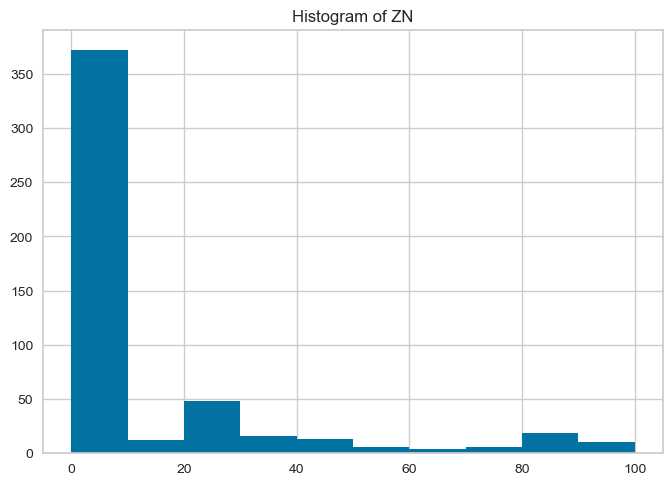

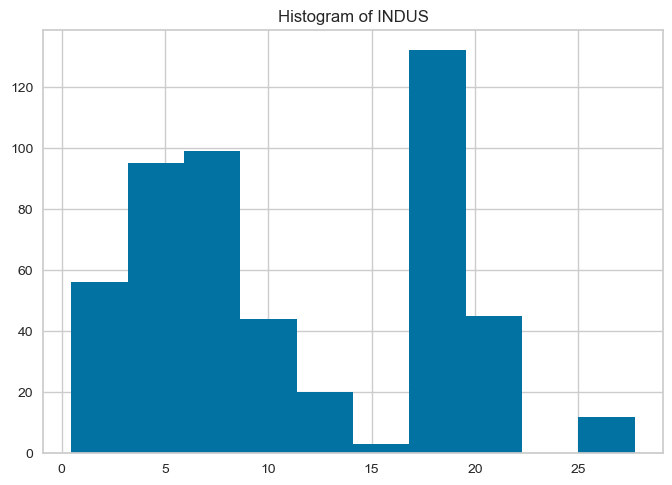

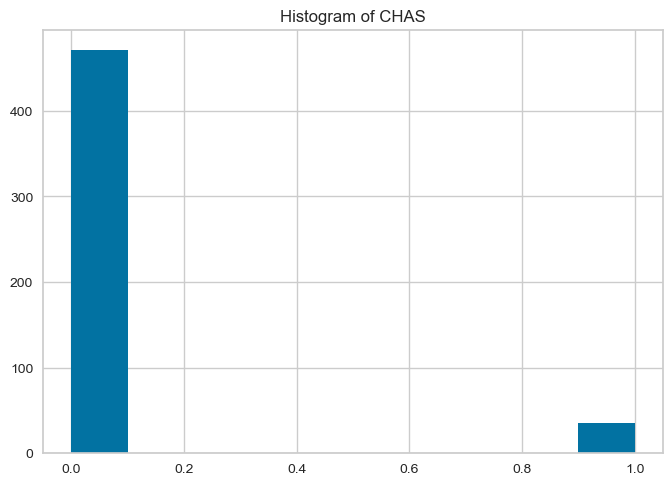

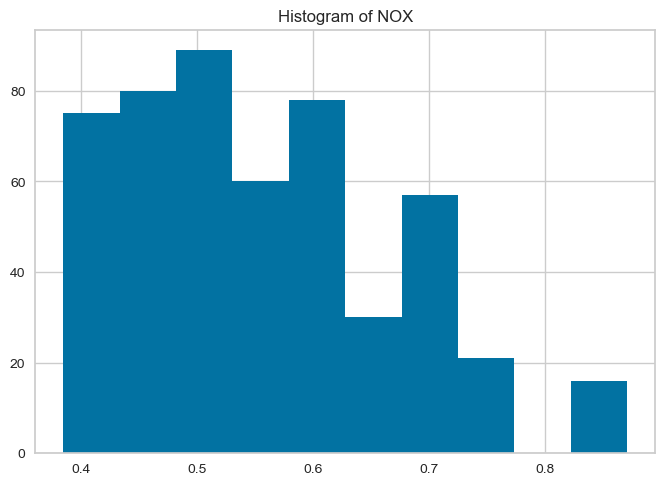

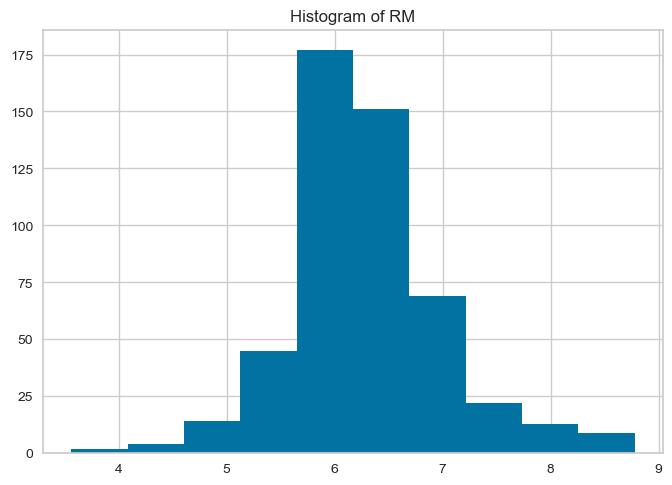

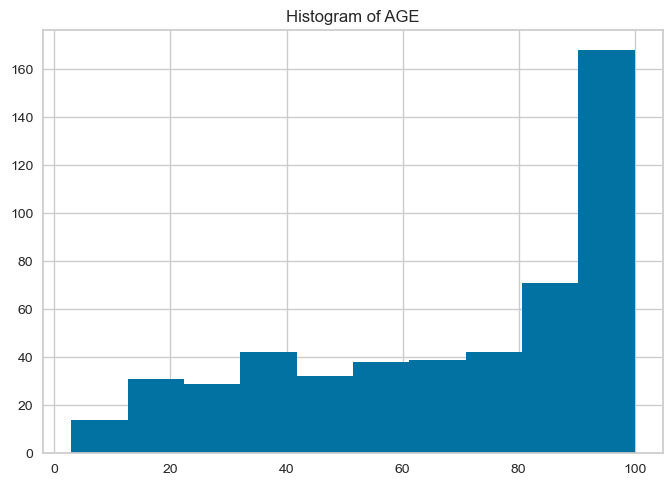

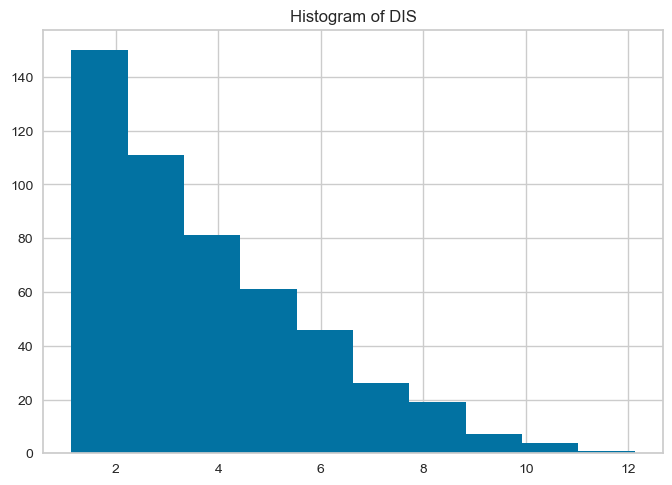

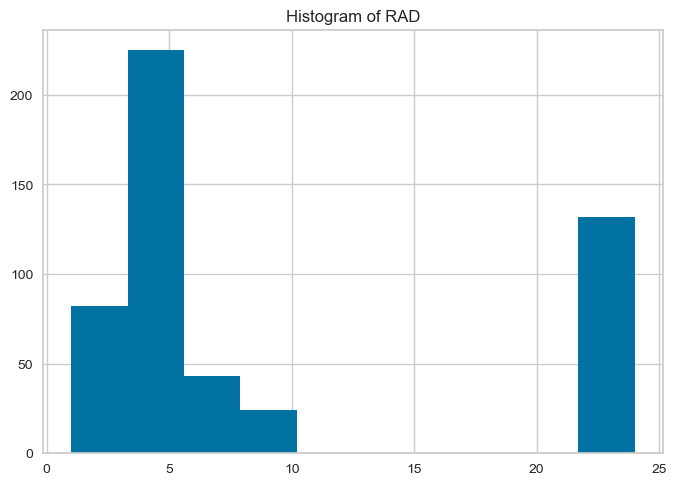

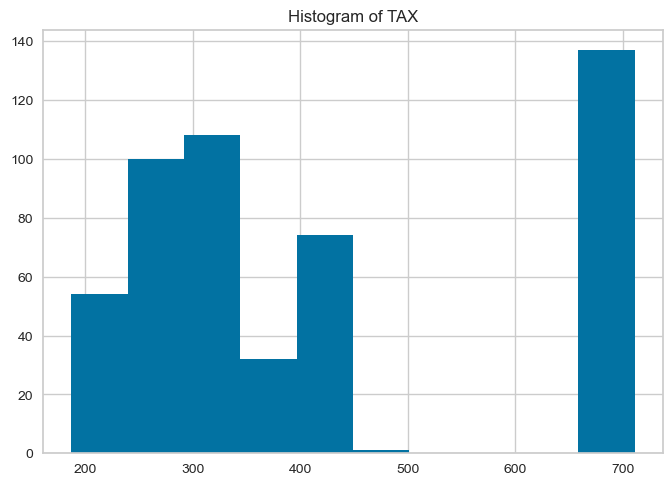

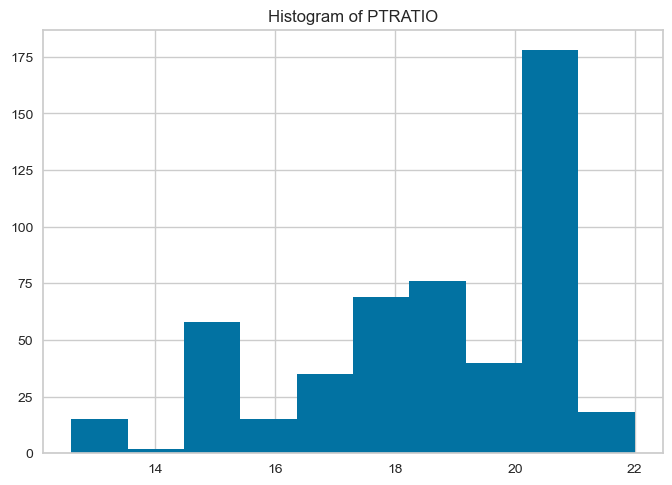

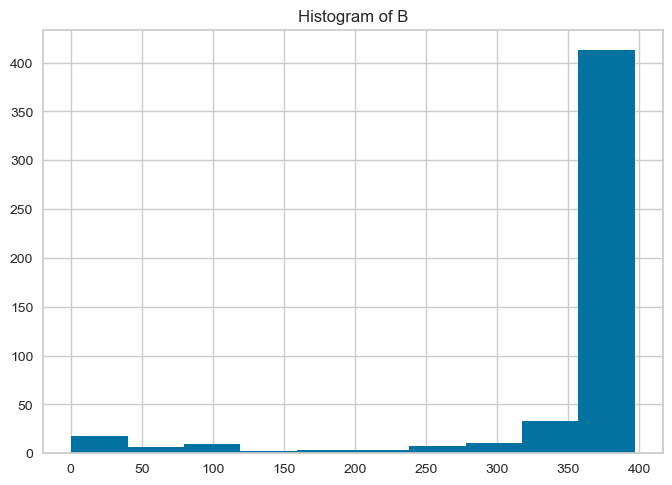

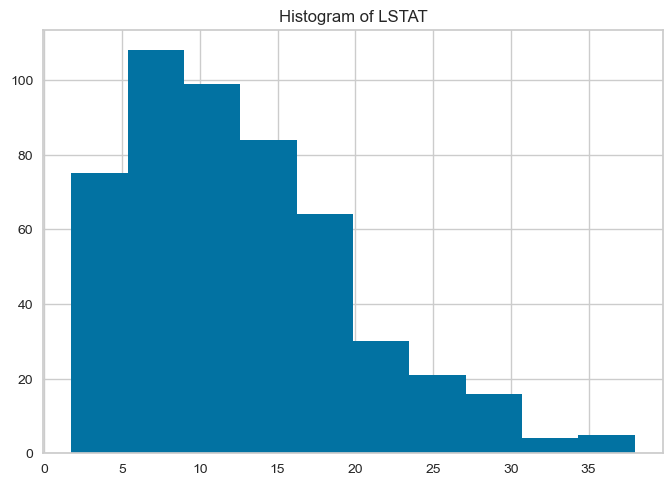

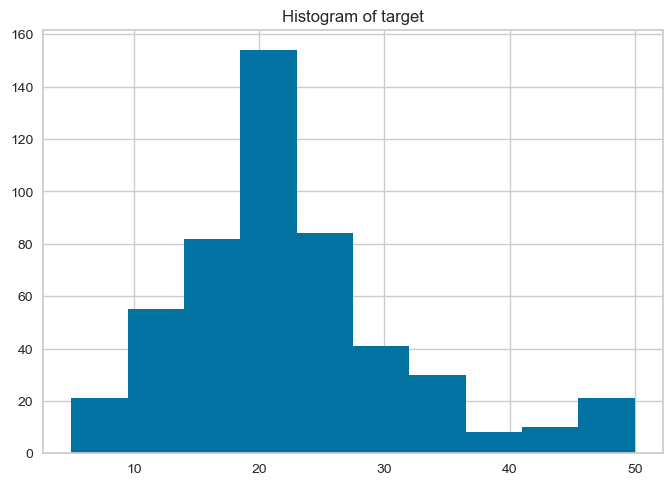

In [58]:
for i in df.columns:
    plt.hist(x=i, data=df)
    plt.title(f'Histogram of {i}')
    plt.show()

### Conc:
    We see non of the features is normally distributed

### Preprocessing and making dataset ready:
    One Hot encoding
    Standard Scaler

In [84]:
ohe=OneHotEncoder(drop='first')
ohe

OneHotEncoder(drop='first')

In [85]:
std=StandardScaler()
std

StandardScaler()

In [88]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', std, num),
        ('cat', ohe, cat)
    ]
)

In [89]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE',
                                  'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['CHAS', 'RAD'])])

In [90]:
# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [92]:
# Fit and transform the data
X_preprocessed = pipeline.fit_transform(df.drop(['target'],axis=1))

In [97]:
# Retrieve the column names after preprocessing
all_column_names = num + list(preprocessor.transformers_[1][1].get_feature_names_out(cat))

# Convert the preprocessed data to a DataFrame
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_column_names)


In [98]:
X_preprocessed_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,CHAS_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.666608,-1.459000,0.441052,-1.075562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.987329,-0.303094,0.441052,-0.492439,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.987329,-0.303094,0.396427,-1.208727,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-1.106115,0.113032,0.416163,-1.361517,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-1.106115,0.113032,0.441052,-1.026501,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.803212,1.176466,0.387217,-0.418147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,-0.415249,-0.487722,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.803212,1.176466,0.441052,-0.500850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,-0.413447,-0.487722,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.803212,1.176466,0.441052,-0.983048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,-0.407764,-0.487722,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.803212,1.176466,0.403225,-0.865302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
X_train,X_test,y_train,y_test=train_test_split(X_preprocessed_df,df['target'], test_size=0.2, random_state=123)

### Function for Regresssion Results Analysis

In [116]:
def cal_accuracy(predicted,actual,model):
    print(f'Result of the Model {model}:')
    print('R squared: ', round(r2_score(predicted,actual),2))
    print('Mean Absolute Error ', round(mean_absolute_error(predicted,actual),2))
    print('Mean Absolute Percentage Error ', round(mean_absolute_percentage_error(predicted,actual),2))
    

### Linear Regression

In [100]:
lr=LinearRegression()

In [101]:
lr.fit(X_train,y_train)

LinearRegression()

In [106]:
lr_pred=lr.predict(X_test)

In [115]:
cal_accuracy(lr_pred,y_test,lr)

Result of the Model LinearRegression():
R squared:  0.57
Mean Absolute Error  3.65
Mean Absolute Percentage Error  0.45


### Ridge Regression

In [121]:
ridge=Ridge()

ridge.fit(X_train,y_train)

ridge_pred = ridge.predict(X_test)

cal_accuracy(ridge_pred, y_test, ridge)

Result of the Model Ridge():
R squared:  0.56
Mean Absolute Error  3.66
Mean Absolute Percentage Error  0.43


### Lasso Regression

In [122]:
lasso = Lasso()

lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

cal_accuracy(lasso_pred, y_test, lasso)

Result of the Model Lasso():
R squared:  0.19
Mean Absolute Error  4.22
Mean Absolute Percentage Error  0.45


### Gaussian Naive Bayes

In [ ]:
naive=GaussianNB()

naive.

### Support Vector Regression

In [123]:
svr = SVR()

svr.fit(X_train, y_train)

svr_pred = svr.predict(X_test)

cal_accuracy(svr_pred, y_test, svr)

Result of the Model SVR():
R squared:  0.07
Mean Absolute Error  3.15
Mean Absolute Percentage Error  0.14


### Decision Tree

In [124]:
dt = DecisionTreeRegressor(min_samples_leaf = 2, min_samples_split = 2)

dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

cal_accuracy(dt_pred, y_test, dt)

Result of the Model DecisionTreeRegressor(min_samples_leaf=2):
R squared:  0.63
Mean Absolute Error  3.44
Mean Absolute Percentage Error  0.14


### Random Forest

In [126]:
rf = RandomForestRegressor(min_samples_leaf=2)

rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

cal_accuracy(rf_pred, y_test, rf)

Result of the Model RandomForestRegressor(min_samples_leaf=2):
R squared:  0.75
Mean Absolute Error  2.45
Mean Absolute Percentage Error  0.1


### Adaboost Regression

In [127]:
ada = AdaBoostRegressor()

ada.fit(X_train, y_train)

ada_pred = ada.predict(X_test)

cal_accuracy(ada_pred, y_test, ada)

Result of the Model AdaBoostRegressor():
R squared:  0.69
Mean Absolute Error  3.12
Mean Absolute Percentage Error  0.14


### Gradient Boost

In [128]:
gb = GradientBoostingRegressor()

gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

cal_accuracy(gb_pred, y_test, gb)

Result of the Model GradientBoostingRegressor():
R squared:  0.81
Mean Absolute Error  2.3
Mean Absolute Percentage Error  0.1


### XG Boost

In [129]:
xgb = xgboost.XGBRegressor()

xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

cal_accuracy(xgb_pred, y_test, xgb)

Result of the Model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...):
R squared:  0.85
Mean Absolute Error  2.19
Mean Absolute Percentage Error  0.09


### Hyper Parameter Tuning

In [139]:
import time

### Grid Search

In [136]:
# Define models and their hyperparameter grids
models = {
    'Linear Regression': (lr, {}),
    'Lasso Regression': (lasso, {'alpha': [0.1, 1.0, 10.0]}),
    'Ridge Regression': (ridge, {'alpha': [0.1, 1.0, 10.0]}),
    'Decision Tree': (dt, {'max_depth': [None, 10, 20]}),
    'Random Forest': (rf, {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}),
    'AdaBoost': (ada, {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.5]}),
    'Gradient Boosting': (gb, {'n_estimators': [50, 100], 'max_depth': [3, 5], 'learning_rate': [0.1, 0.5]}),
    'XGBoost': (xgb, {'n_estimators': [50, 100], 'max_depth': [3, 5], 'learning_rate': [0.1, 0.5]})
}


In [144]:
# Perform GridSearchCV for each model
t=0
for model_name, (model, param_grid) in models.items():
    start_time = time.time()
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"{model_name} - Best Parameters: {grid_search.best_params_}, Mean Squared Error: {mse}, Mean Absolute Error: {mae}")
    print("Time taken is ",end_time-start_time)
    t = t + end_time-start_time
print(f'Total time {t}')

Linear Regression - Best Parameters: {}, Mean Squared Error: 28.38478925724644, Mean Absolute Error: 3.6487549020065977
Time taken is  0.02048969268798828
Lasso Regression - Best Parameters: {'alpha': 0.1}, Mean Squared Error: 31.447026374873147, Mean Absolute Error: 3.765702692705875
Time taken is  0.054851531982421875
Ridge Regression - Best Parameters: {'alpha': 10.0}, Mean Squared Error: 29.166157570062854, Mean Absolute Error: 3.638511890164319
Time taken is  0.0308074951171875
Decision Tree - Best Parameters: {'max_depth': 10}, Mean Squared Error: 38.810777100164344, Mean Absolute Error: 3.483591884122069
Time taken is  0.047368764877319336
Random Forest - Best Parameters: {'max_depth': 20, 'n_estimators': 100}, Mean Squared Error: 19.01151557664144, Mean Absolute Error: 2.43510318839657
Time taken is  3.159959077835083
AdaBoost - Best Parameters: {'learning_rate': 0.5, 'n_estimators': 100}, Mean Squared Error: 14.656117540281679, Mean Absolute Error: 2.7833891513813023
Time take

### Random Search

In [143]:
# Perform RandomizedSearchCV for each model and measure time
t=0
for model_name, (model, param_dist) in models.items():
    start_time = time.time()  # Record start time
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')
    random_search.fit(X_train, y_train)
    end_time = time.time()  # Record end time
    
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    search_time = end_time - start_time  # Calculate search time
    
    print(f"{model_name} - Best Parameters: {random_search.best_params_}, Mean Squared Error: {mse}, Mean Absolute Error: {mae}")
    print("Time taken is ",end_time-start_time)
    t = t + end_time-start_time
print(f'Total time {t}')

Linear Regression - Best Parameters: {}, Mean Squared Error: 28.38478925724644, Mean Absolute Error: 2.196122117136039
Time taken is  0.022462844848632812
Lasso Regression - Best Parameters: {'alpha': 0.1}, Mean Squared Error: 31.447026374873147, Mean Absolute Error: 2.196122117136039
Time taken is  0.03897881507873535
Ridge Regression - Best Parameters: {'alpha': 10.0}, Mean Squared Error: 29.166157570062854, Mean Absolute Error: 2.196122117136039
Time taken is  0.02829766273498535
Decision Tree - Best Parameters: {'max_depth': 10}, Mean Squared Error: 39.492737884478075, Mean Absolute Error: 2.196122117136039
Time taken is  0.04824566841125488
Random Forest - Best Parameters: {'n_estimators': 100, 'max_depth': None}, Mean Squared Error: 20.12620112824661, Mean Absolute Error: 2.196122117136039
Time taken is  3.221644639968872
AdaBoost - Best Parameters: {'n_estimators': 100, 'learning_rate': 0.1}, Mean Squared Error: 13.916828829141727, Mean Absolute Error: 2.196122117136039
Time tak

### Plot the best model Charachterstics

### Note:
    We will Plot Xgboost and Random Forest

In [163]:
import statsmodels.api as sm
from sklearn.metrics import explained_variance_score

In [164]:
def plot_res(y_test, y_pred):    
    # Scatter Plot of Predicted vs. Actual Values
    plt.subplot(2, 2, 1)
    plt.scatter(y_test, y_pred )
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Scatter Plot of Predicted vs. Actual Values for XG Boost')
    plt.show()

    # Residual Plot
    plt.subplot(2, 2, 2)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot for XG Boost')
    plt.show()

    # Distribution of Residuals
    plt.subplot(2, 2, 3)
    plt.hist(residuals, bins=20)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals for XG Boost')
    plt.show()

    # Q-Q Plot
    plt.subplot(2, 2, 4)
    sm.qqplot(residuals, line='s')
    plt.title('Q-Q Plot of Residuals')

    plt.tight_layout()
    plt.show()
    
    # Calculate and display metrics
    mse = mean_squared_error(y_test, xgb.predict(X_test))
    evs = explained_variance_score(y_test, xgb.predict(X_test))
    r2 = r2_score(y_test, xgb.predict(X_test))

    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Explained Variance Score: {evs:.2f}")
    print(f"R-squared: {r2:.2f}")

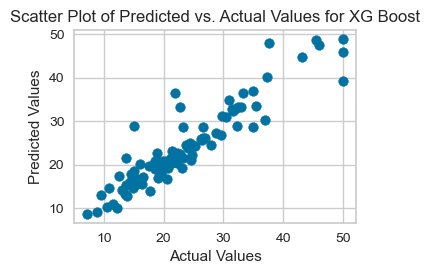

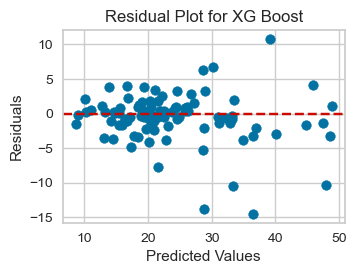

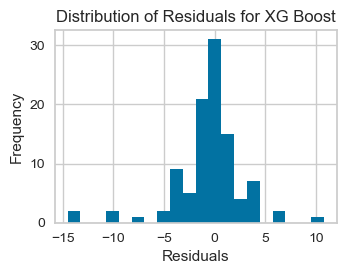

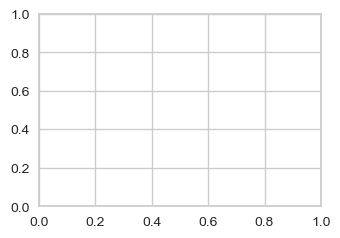

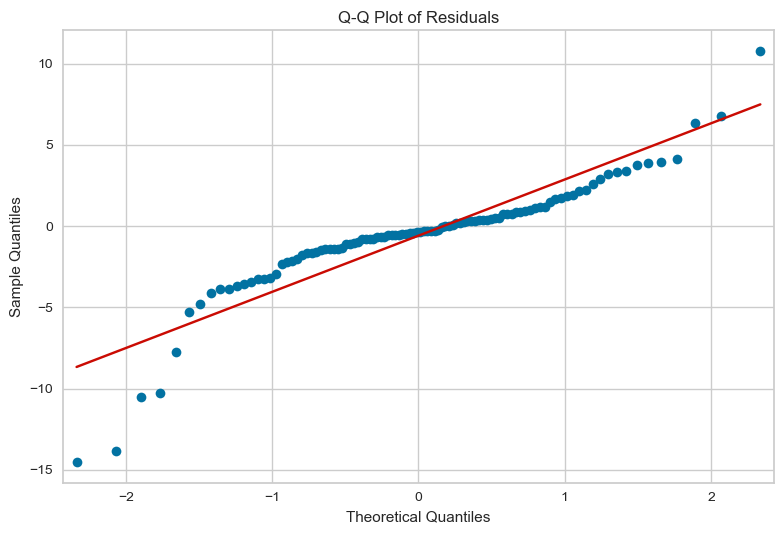

Mean Squared Error: 12.30
Explained Variance Score: 0.86
R-squared: 0.85


In [165]:
plot_res(y_test, xgb.predict(X_test))

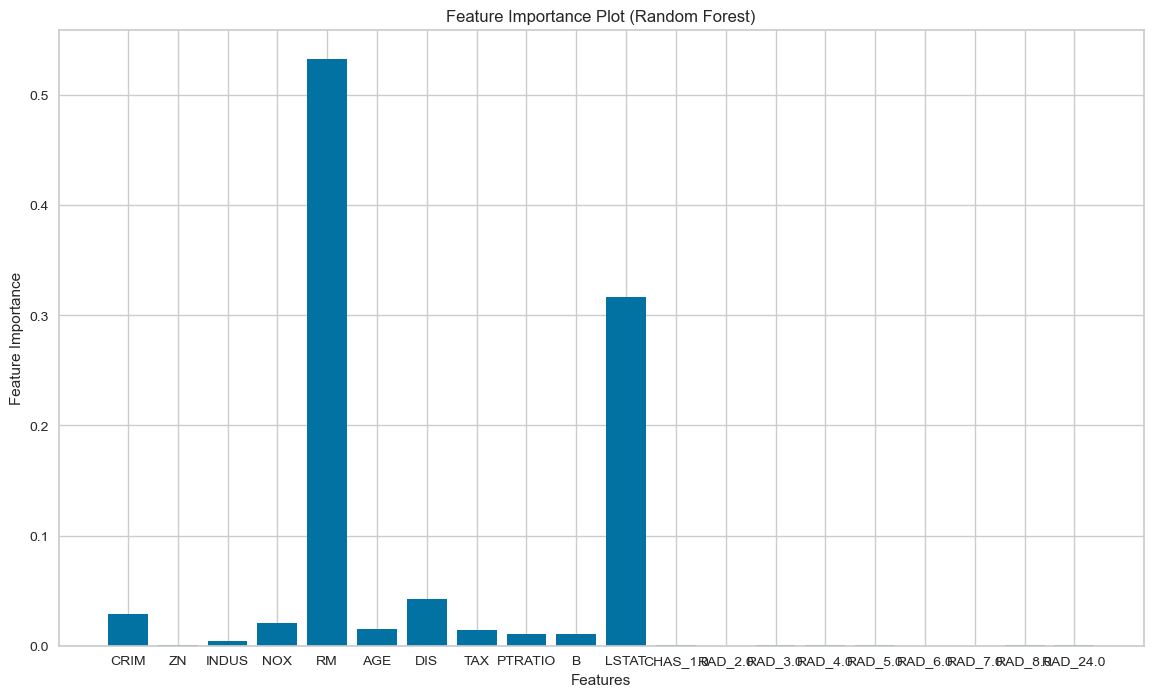

In [172]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
feature_importances = rf.feature_importances_
plt.figure(figsize=(14,8))
plt.bar(range(X_train.shape[1]), feature_importances)
plt.xticks(range(X_train.shape[1]), labels=X_train.columns)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot (Random Forest)')
plt.show()

### Note:
    Not used K fold cross validation

## Pycaret Regression

In [174]:
from pycaret.regression import *

In [175]:
exp_reg = setup(data=df, target='target')

,Description,Value
0,Session id,7458
1,Target,target
2,Target type,Regression
3,Original data shape,"(506, 14)"
4,Transformed data shape,"(506, 14)"
5,Transformed train set shape,"(354, 14)"
6,Transformed test set shape,"(152, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [176]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.2528,11.7570,3.3089,0.8554,0.1429,0.1133,1.0250
gbr,Gradient Boosting Regressor,2.3624,12.5820,3.4230,0.8446,0.1508,0.1205,1.1910
xgboost,Extreme Gradient Boosting,2.3399,13.1465,3.4618,0.8384,0.1567,0.1198,1.1810
lightgbm,Light Gradient Boosting Machine,2.4340,13.3724,3.5360,0.8321,0.1631,0.1249,1.2860
rf,Random Forest Regressor,2.3749,14.0390,3.6188,0.8249,0.1597,0.1230,1.0160
ada,AdaBoost Regressor,2.8687,16.7993,3.9886,0.7896,0.1833,0.1525,1.0880
lar,Least Angle Regression,3.3521,23.2286,4.6879,0.7111,0.2566,0.1679,1.2500
lr,Linear Regression,3.3550,23.3263,4.7011,0.7095,0.2567,0.1678,2.3690
ridge,Ridge Regression,3.3512,23.4638,4.7048,0.7088,0.2641,0.1683,0.8650
br,Bayesian Ridge,3.4400,24.2302,4.8012,0.6981,0.2584,0.1715,0.9830


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [178]:
# Tune hyperparameters of the best model
tuned_model = tune_model(best_model)

# Make predictions
predictions = predict_model(tuned_model, data=df)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0417,17.2849,4.1575,0.7697,0.2061,0.1712
1,2.2042,9.7109,3.1162,0.8337,0.1317,0.1071
2,3.4257,21.5882,4.6463,0.8021,0.2054,0.1742
3,3.4906,38.1573,6.1772,0.5577,0.2422,0.1709
4,2.8961,34.5144,5.8749,0.5568,0.1962,0.1127
5,2.5738,24.3945,4.9391,0.6033,0.1659,0.1106
6,3.7791,26.4878,5.1466,0.7461,0.2308,0.1957
7,2.3839,9.4439,3.0731,0.8536,0.1561,0.1327
8,3.0140,20.4858,4.5261,0.7876,0.1785,0.1378


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.5895,2.8561,1.6900,0.9662,0.0682,0.0276


In [179]:
# Finalize the model for deployment (optional)
final_model = finalize_model(tuned_model)

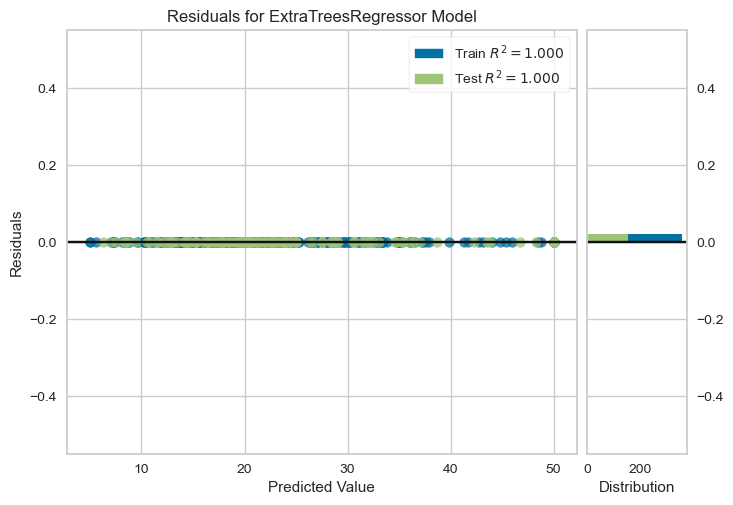

In [180]:
plot_model(final_model)

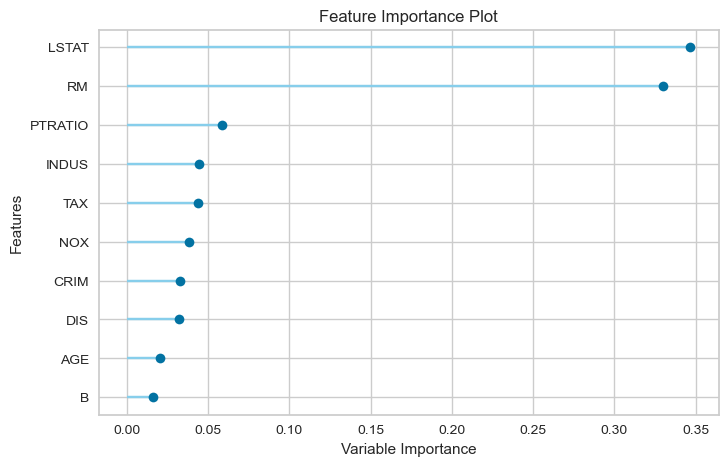

In [181]:
plot_model(final_model, plot='feature')

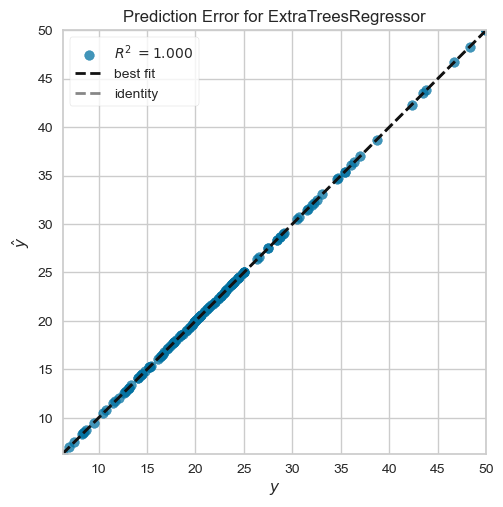

In [182]:
plot_model(final_model, plot='error')